In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

import pathlib
import os
import matplotlib.style as style

# Настройки графиков
style.use('seaborn-poster')
style.use('ggplot')

CUR_FILE_PATH = pathlib.Path(os.getcwd()).resolve()
CUR_FILE_PATH

/tmp/ipykernel_4283/157736727.py:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  style.use('seaborn-poster')


PosixPath('/home/migisen/Study/misis-dshack/notebooks')

# Предварительный обзор данных

Рассмотрим данные на примере акций Сбербанка

## Загрузка данных


In [2]:
sber_stocks = pd.read_csv(CUR_FILE_PATH.parent.resolve() / 'data' /'SBER_210111_230531.csv', sep=",")
display(sber_stocks)
display(sber_stocks.info())
display(sber_stocks.describe())

,<TICKER>,<PER>,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>
0,SBER,60,20210111,110000,282.75,282.85,279.48,282.80,10682660
1,SBER,60,20210111,120000,282.80,290.50,282.72,290.11,23398690
2,SBER,60,20210111,130000,290.18,290.35,287.85,288.13,8483540
3,SBER,60,20210111,140000,288.13,289.49,286.75,289.11,7612690
4,SBER,60,20210111,150000,289.18,290.17,288.57,289.77,5651950
...,...,...,...,...,...,...,...,...,...
7785,SBER,60,20230531,200000,245.64,246.19,245.13,245.58,1490860
7786,SBER,60,20230531,210000,245.62,246.20,245.02,245.84,1167320
7787,SBER,60,20230531,220000,245.84,245.98,245.35,245.71,562350
7788,SBER,60,20230531,230000,245.71,245.85,245.61,245.68,540030


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7790 entries, 0 to 7789
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   <TICKER>  7790 non-null   object 
 1   <PER>     7790 non-null   int64  
 2   <DATE>    7790 non-null   int64  
 3   <TIME>    7790 non-null   int64  
 4   <OPEN>    7790 non-null   float64
 5   <HIGH>    7790 non-null   float64
 6   <LOW>     7790 non-null   float64
 7   <CLOSE>   7790 non-null   float64
 8   <VOL>     7790 non-null   int64  
dtypes: float64(4), int64(4), object(1)
memory usage: 547.9+ KB


None

,<PER>,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>
count,7790.0,7.790000e+03,7790.000000,7790.000000,7790.000000,7790.000000,7790.000000,7.790000e+03
mean,60.0,2.021789e+07,155293.966624,233.659015,234.452685,232.831236,233.649286,5.429056e+06
std,0.0,7.434598e+03,53987.817174,81.844002,81.909642,81.762913,81.839182,8.459391e+06
min,60.0,2.021011e+07,0.000000,89.600000,102.590000,89.590000,89.590000,6.670000e+04
25%,60.0,2.021073e+07,130000.000000,139.962500,140.450000,139.550000,139.970000,1.344055e+06
50%,60.0,2.022013e+07,160000.000000,258.780000,260.325000,257.505000,258.660000,3.112835e+06
75%,60.0,2.022111e+07,190000.000000,303.035000,303.715000,302.400000,303.040000,6.262420e+06
max,60.0,2.023060e+07,230000.000000,387.300000,388.110000,386.710000,387.600000,1.511237e+08


## Преобразование данных

Преобразуем столбцы `<DATE>` и `<TIME>` в столбец `<DATETIME>`

In [3]:
sber_stocks['<TIME>'] = sber_stocks['<TIME>'].apply(lambda x: 100000 if x == 0 else x)
sber_stocks['<DATETIME>'] = pd.to_datetime(sber_stocks["<DATE>"].astype(str) + sber_stocks["<TIME>"].astype(str), format='%Y%m%d%H%M%S')
sber_stocks

,<TICKER>,<PER>,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>,<DATETIME>
0,SBER,60,20210111,110000,282.75,282.85,279.48,282.80,10682660,2021-01-11 11:00:00
1,SBER,60,20210111,120000,282.80,290.50,282.72,290.11,23398690,2021-01-11 12:00:00
2,SBER,60,20210111,130000,290.18,290.35,287.85,288.13,8483540,2021-01-11 13:00:00
3,SBER,60,20210111,140000,288.13,289.49,286.75,289.11,7612690,2021-01-11 14:00:00
4,SBER,60,20210111,150000,289.18,290.17,288.57,289.77,5651950,2021-01-11 15:00:00
...,...,...,...,...,...,...,...,...,...,...
7785,SBER,60,20230531,200000,245.64,246.19,245.13,245.58,1490860,2023-05-31 20:00:00
7786,SBER,60,20230531,210000,245.62,246.20,245.02,245.84,1167320,2023-05-31 21:00:00
7787,SBER,60,20230531,220000,245.84,245.98,245.35,245.71,562350,2023-05-31 22:00:00
7788,SBER,60,20230531,230000,245.71,245.85,245.61,245.68,540030,2023-05-31 23:00:00


In [4]:
sber_stocks[['<OPEN>', '<HIGH>', '<LOW>', '<CLOSE>', '<VOL>']].corr()

,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>
<OPEN>,1.000000,0.999861,0.999838,0.999797,-0.104534
<HIGH>,0.999861,1.000000,0.999678,0.999850,-0.094574
<LOW>,0.999838,0.999678,1.000000,0.999888,-0.114341
<CLOSE>,0.999797,0.999850,0.999888,1.000000,-0.104727
<VOL>,-0.104534,-0.094574,-0.114341,-0.104727,1.000000


### Датафрейм дневных данных

Дополнительно построим таблицу с дневными данными, для этого возьмем значение <CLOSE> в конце каждого дня торгов.

Кроме того, добавим сумму объема торгов за день.

In [49]:
daily_volume = sber_stocks[['<DATE>', '<VOL>']].groupby('<DATE>').count()
daily_volume['is_usual'] = daily_volume['<VOL>'].apply(lambda x: False if x == 14 or x == 13 else True)
display(f'Количество неполных дней: {daily_volume["is_usual"].sum()}')
daily_volume = sber_stocks[['<DATE>', '<VOL>']].groupby('<DATE>').sum()
# daily_volume.reset_index(inplace=True, drop=False)
display(daily_volume)

'Количество неполных дней: 277'

,<VOL>
<DATE>,
20210111,111758030
20210112,78534840
20210113,67553650
20210114,74664310
20210115,73408800
...,...
20230527,1521910
20230529,66119980
20230530,82764840


Видим, что можем потерять много наблюдений, если брать 23 час как последнее наблюдение, будем использовать последнее имеющееся значение CLOSE за каждый день

In [58]:
max_time = sber_stocks[['<DATE>','<TIME>']].groupby('<DATE>').max()
# sber_stocks.join(max_time, on=['<DATE>', '<TIME>'])
# max_time.join(sber_stocks, on=['<DATE>', '<TIME>'])
max_time.reset_index(drop=False, inplace=True)
daily_sber_stocks = max_time.merge(sber_stocks, on=['<DATE>', '<TIME>'])
daily_sber_stocks.drop(['<VOL>', '<PER>'], axis=1, inplace=True)
daily_sber_stocks = daily_sber_stocks.merge(daily_volume, on='<DATE>')
daily_sber_stocks.set_index('<DATETIME>', inplace=True)
daily_sber_stocks

,<DATE>,<TIME>,<TICKER>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>
<DATETIME>,,,,,,,,
2021-01-11 23:00:00,20210111,230000,SBER,289.42,289.46,288.88,289.37,111758030
2021-01-12 23:00:00,20210112,230000,SBER,288.56,289.65,288.48,289.56,78534840
2021-01-13 23:00:00,20210113,230000,SBER,284.43,285.16,284.18,284.56,67553650
2021-01-14 23:00:00,20210114,230000,SBER,285.05,285.30,284.75,284.99,74664310
2021-01-15 23:00:00,20210115,230000,SBER,276.98,277.20,276.78,277.09,73408800
...,...,...,...,...,...,...,...,...
2023-05-27 10:00:00,20230527,100000,SBER,248.33,248.43,248.06,248.10,1521910
2023-05-29 23:00:00,20230529,230000,SBER,251.60,251.92,251.50,251.70,66119980
2023-05-30 23:00:00,20230530,230000,SBER,245.25,245.35,244.40,244.47,82764840


# Визуализация значений котировок

## Почасовые данные

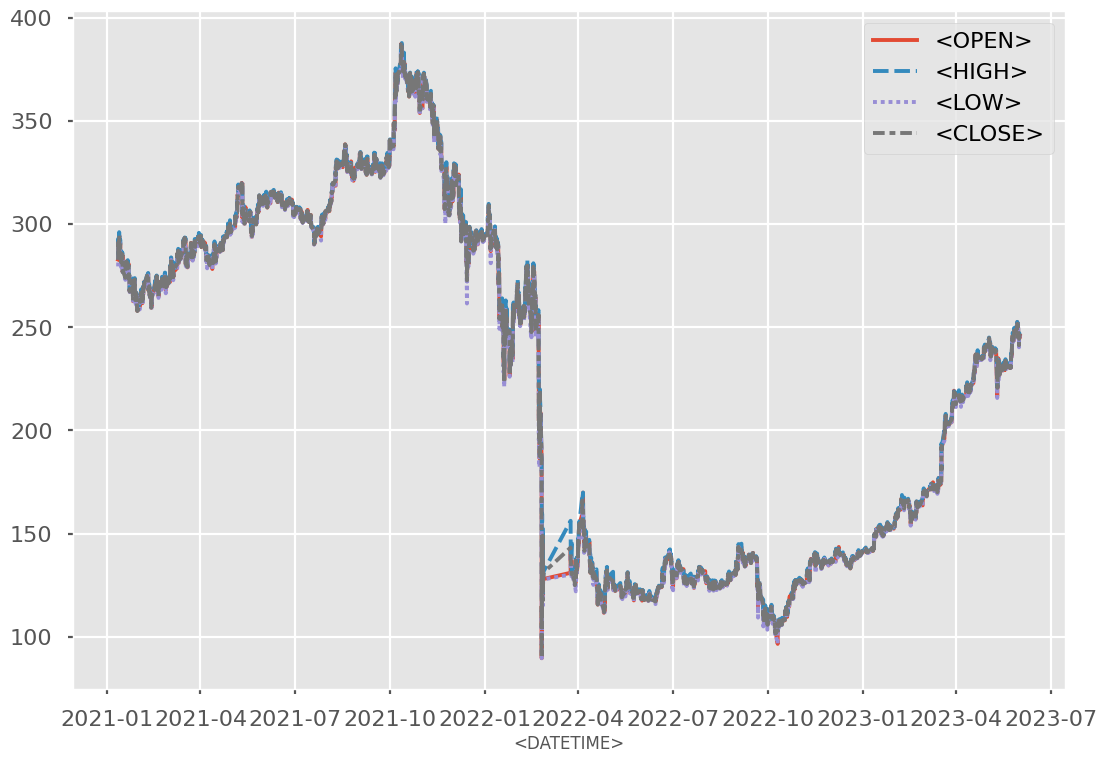

In [64]:
sns.lineplot(sber_stocks.set_index('<DATETIME>')[['<OPEN>', '<HIGH>', '<LOW>', '<CLOSE>']]);

Имеется структурный сдвиг в феврале 2022 года, возможно, стоит исключить этот период при построении модели.

### Объемы торгов

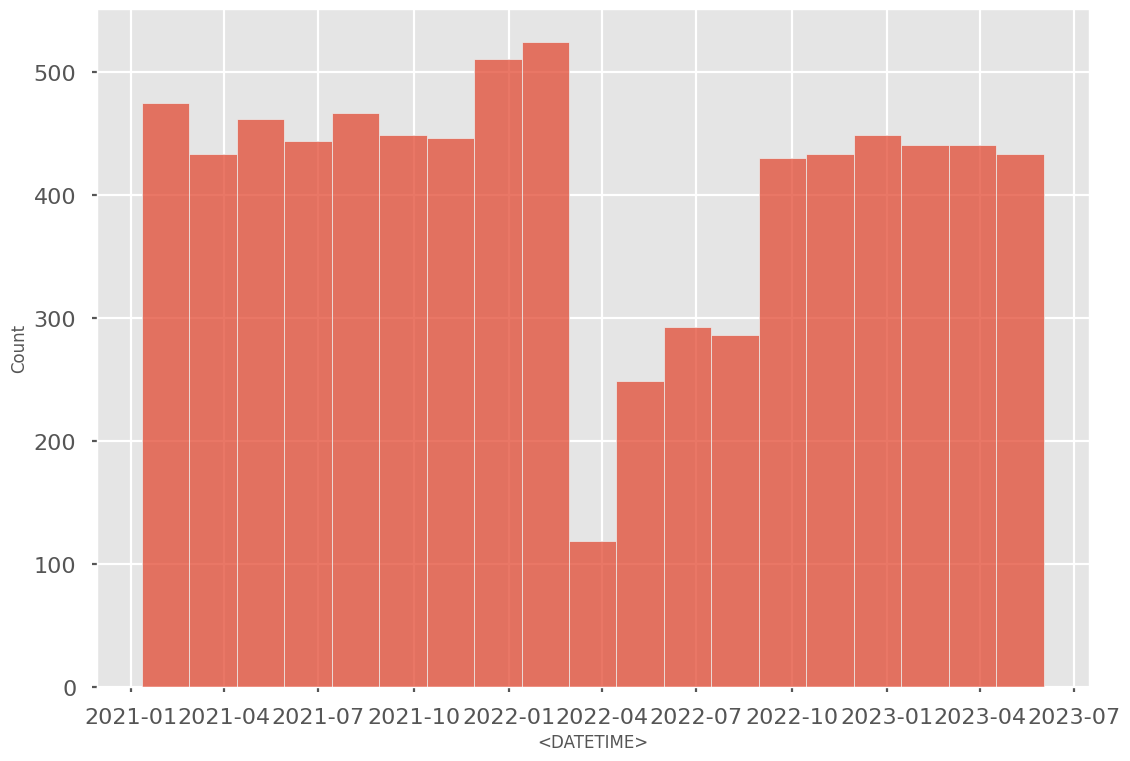

In [66]:
sns.histplot(sber_stocks.set_index('<DATETIME>')[['<VOL>']], x='<DATETIME>');

## Дневные данные

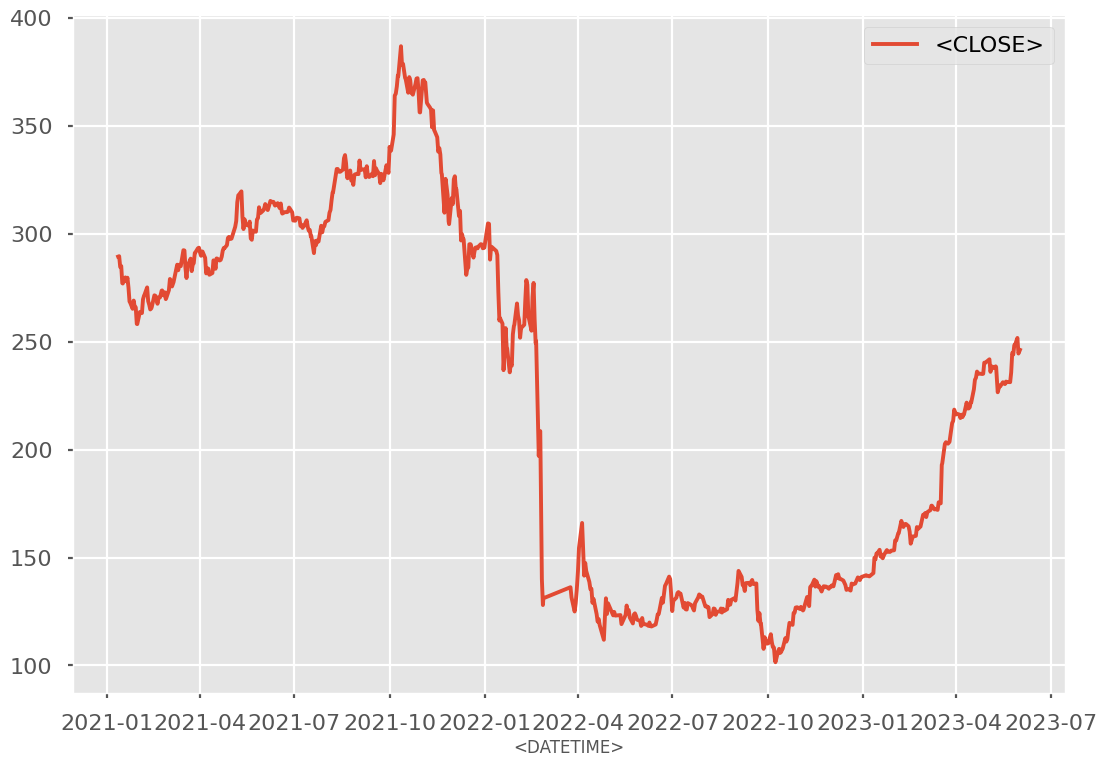

In [68]:
sns.lineplot(daily_sber_stocks[['<CLOSE>']]);